# Time series analysis
 Lund University

## Example code 2: examining roots, spectra, and ACF.

**Reference:**  
*"An Introduction to Time Series Modeling", 4th ed, by Andreas Jakobsson*  
*Studentlitteratur, 2021*

Lets have fun!

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.fftpack import fft, fftshift
import scipy.stats as stats

import sys
import os
# import TSA library
sys.path.append(os.path.join('..', 'TimeSeriesAnalysis-main', 'TimeSeriesAnalysis-main'))
from tsa_lth.analysis import acf, pacf, pzmap

# Configure matplotlib 
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.0



Simulate some processes. Ignore the initial samples to avoid any initialization effects.

In [2]:
np.random.seed(0)  # For reproducibility
extraN = 100
N  = 100                                        # Also try using N = 1000.
C  = np.array([ 1, 0.6, 0, 0, 0.4 ])
A  = np.array([ 1, -0.4, 0.6 ])                # Note: the roots must be inside the unit circle! Try putting them outside...
e  = np.random.randn( N+extraN )
y1 = lfilter( C, 1, e )[extraN:]                # MA process
y2 = lfilter( 1, A, e )[extraN:]                # AR process  
y3 = lfilter( C, A, e )[extraN:]                # ARMA process

Plot realisations and the roots of the generating polynomials.

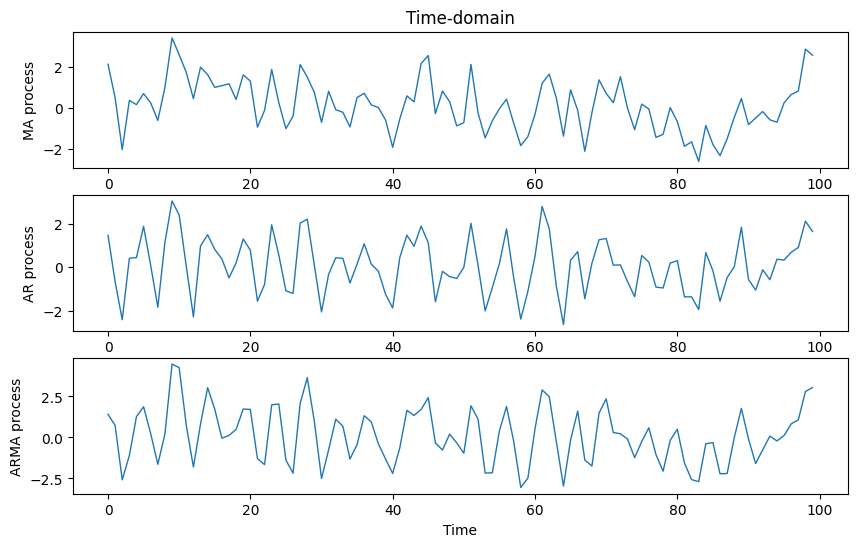

In [3]:
plt.figure()
plt.subplot(311)
plt.plot(y1)
plt.title('Time-domain')
plt.ylabel('MA process')

plt.subplot(312)
plt.plot(y2)
plt.ylabel('AR process')

plt.subplot(313)
plt.plot(y3)
plt.ylabel('ARMA process')
plt.xlabel('Time')

plt.show()

## Estimate the ACF.

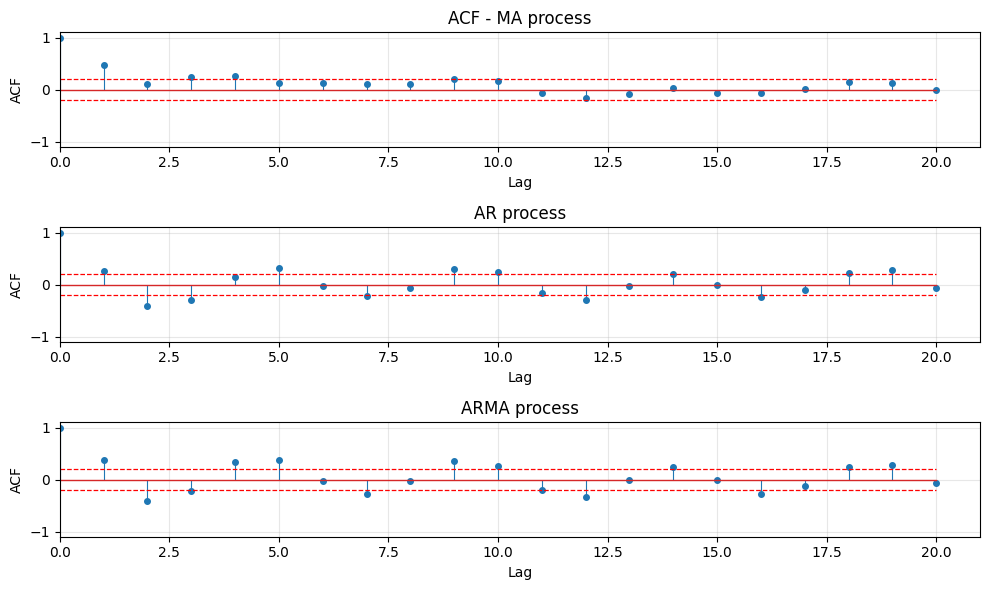

In [4]:
noLags = 20
alpha = 0.05  # Confidence level
z = stats.norm.ppf(1 - alpha/2)  # Critical value (e.g., 1.96 for 95%)
bound = z / np.sqrt(N)

plt.figure()

# ACF for y1 (MA process)
plt.subplot(311)
acf_y1 = acf(y1, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('ACF - MA process')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y2 (AR process)
plt.subplot(312)
acf_y2 = acf(y2, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('AR process')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y3 (ARMA process)
plt.subplot(313)
acf_y3 = acf(y3, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('ARMA process')
plt.ylabel('ACF')
plt.xlabel('Lag')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Examine the roots of the characteristic polynomials. 
Given these, what should the spectrum look like?

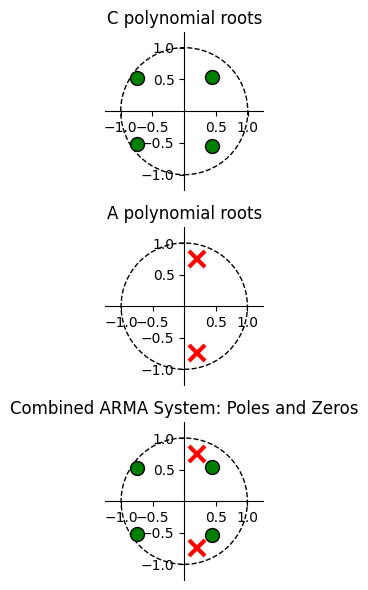

In [5]:

plt.figure()

ax1 = plt.subplot(311)
pzmap(C, 1, ax=ax1, show=False)
plt.title('C polynomial roots')

ax2 = plt.subplot(312)
pzmap(1, A, ax=ax2, show=False)

plt.title('A polynomial roots')

ax3 = plt.subplot(313)
pzmap(C, A, ax=ax3, show=False)  # C as numerator (zeros), A as denominator (poles)
plt.title('Combined ARMA System: Poles and Zeros')

plt.tight_layout()
plt.show()

Which frequencies should we look a bit more at?

In [6]:
rootsA = np.angle(np.roots(A))/np.pi/2
rootsC = np.angle(np.roots(C))/np.pi/2
print(f'The (positive) angle of the root of the A polynomial is {rootsA[0]:.2f} degrees.')
print(f'The (positive) angles of the roots of the C polynomial are {rootsC[2]:.2f} and {rootsC[0]:.2f} degrees.')

The (positive) angle of the root of the A polynomial is 0.21 degrees.
The (positive) angles of the roots of the C polynomial are 0.14 and 0.40 degrees.


## Estimate the power spectral density using the periodogram.

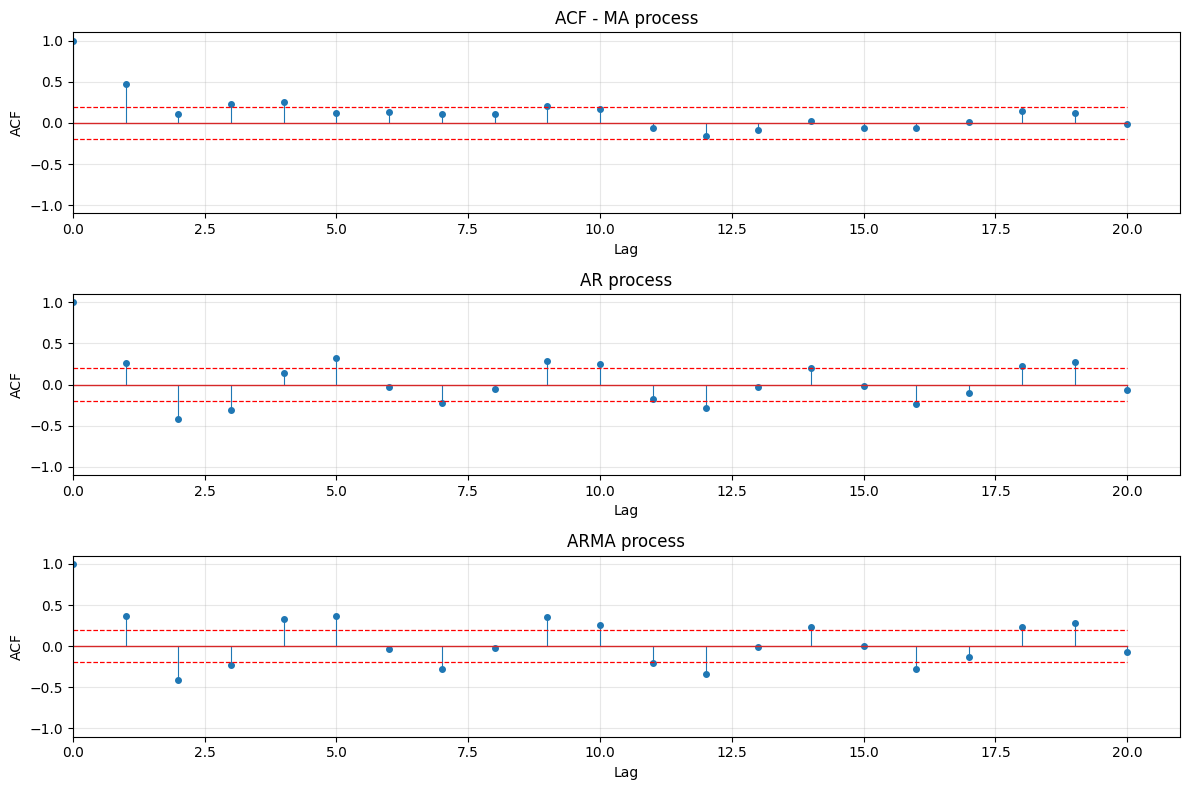

In [7]:
noLags = 20
alpha = 0.05  # Confidence level

plt.figure(figsize=(12, 8))

# ACF for y1 (MA process)
plt.subplot(311)
acf_y1 = acf(y1, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('ACF - MA process')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y2 (AR process)
plt.subplot(312)
acf_y2 = acf(y2, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('AR process')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y3 (ARMA process)
plt.subplot(313)
acf_y3 = acf(y3, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('ARMA process')
plt.ylabel('ACF')
plt.xlabel('Lag')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
Padd = 1024
Y1 = fftshift( np.abs( fft(y1, Padd) )**2 / N )
Y2 = fftshift( np.abs( fft(y2, Padd) )**2 / N )
Y3 = fftshift( np.abs( fft(y3, Padd) )**2 / N )

# Compute the true spectra. 
w  = np.exp( 1j* np.linspace(-.5,.5,Padd)*2*np.pi )
X1 = np.abs( np.polyval(C, w) )**2
X2 = 1 / np.abs( np.polyval(A, w) )**2
X3 = X1 * X2

Plot the resulting spectra

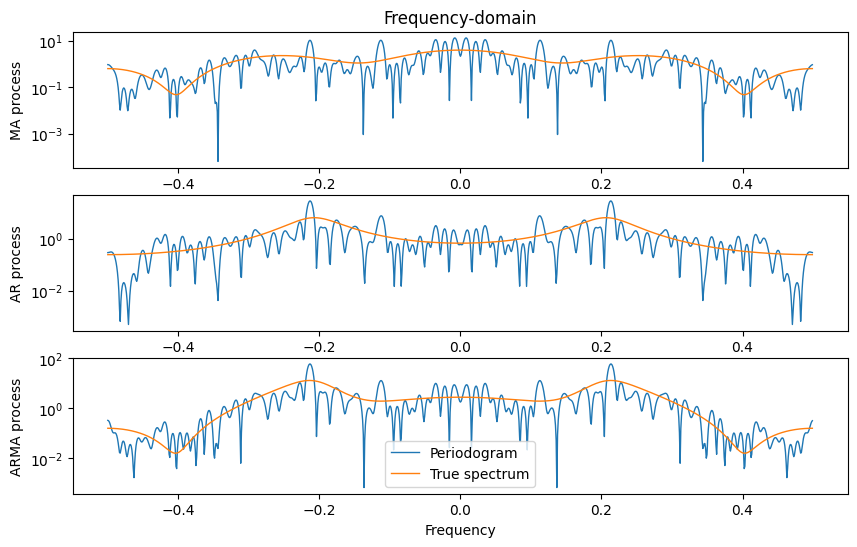

In [9]:
ff = np.arange(Padd)/Padd - 0.5

plt.figure()
plt.subplot(311)
plt.semilogy(ff, Y1, label='Periodogram')
plt.semilogy(ff, X1, label='True spectrum')
plt.title('Frequency-domain')
plt.ylabel('MA process')

plt.subplot(312)
plt.semilogy(ff, Y2, label='Periodogram')
plt.semilogy(ff, X2, label='True spectrum')
plt.ylabel('AR process')

plt.subplot(313)
plt.semilogy(ff, Y3, label='Periodogram')
plt.semilogy(ff, X3, label='True spectrum')
plt.ylabel('ARMA process')
plt.xlabel('Frequency')
plt.legend()
plt.show()

Estimate the PACF. Note how the PACF can be used to identify AR-processes.

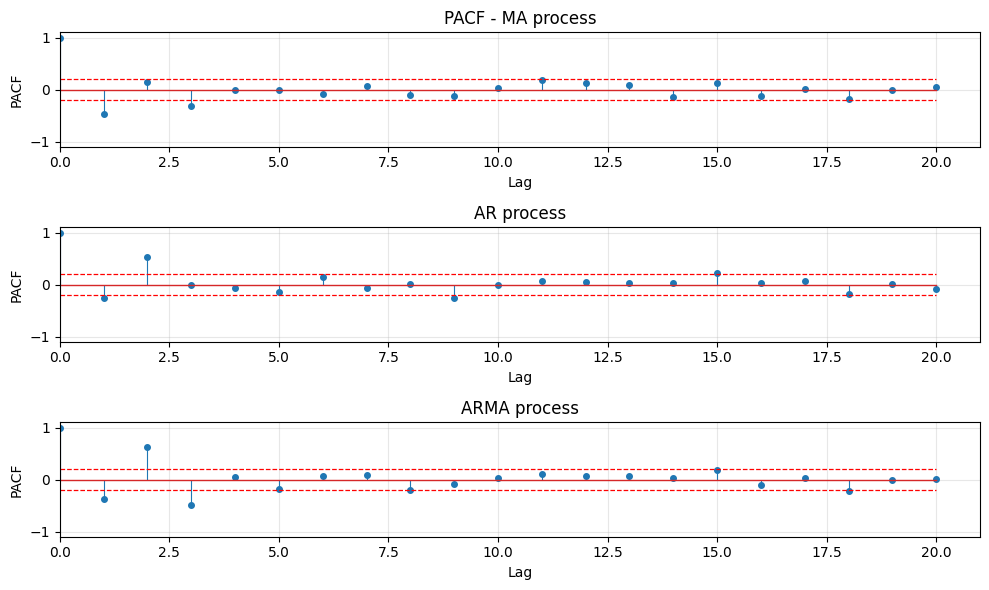

In [10]:
noLags = 20
alpha = 0.05  # Confidence level
z = stats.norm.ppf(1 - alpha/2)  # Critical value (e.g., 1.96 for 95%)
bound = z / np.sqrt(N)

plt.figure()

# PACF for y1 (MA process)
plt.subplot(311)
pacf_y1 = pacf(y1, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('PACF - MA process')
plt.ylabel('PACF')
plt.grid(True, alpha=0.3)

# PACF for y2 (AR process)
plt.subplot(312)
pacf_y2 = pacf(y2, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('AR process')
plt.ylabel('PACF')
plt.grid(True, alpha=0.3)

# PACF for y3 (ARMA process)
plt.subplot(313)
pacf_y3 = pacf(y3, noLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('ARMA process')
plt.ylabel('PACF')
plt.xlabel('Lag')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()